# Pré-processamento de dados usando a base de dados de risco de crédito

# Importação das bibliotecas básicas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [3]:
base_credit = pd.read_csv('../datasets/credit_data.csv')

In [4]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
#visualizando os 10 primeiros registros
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [6]:
#visualizando os últimos 10 registros
base_credit.tail(10)

,clientid,income,age,loan,default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [7]:
#estatísticas para cada um dos atributos 
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
#Buscando a pessoa com maior renda na base
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [9]:
#buscando a pessoa com menor dívida
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [10]:
#contagem de quantos registros existem em cada uma das classes
np.unique(base_credit['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

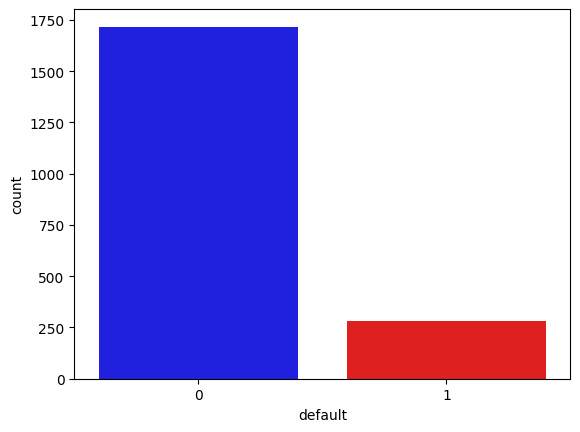

In [11]:
#gerando gráfico de contagem (countplot)
sns.countplot(x=base_credit['default'], hue=base_credit['default'], palette=['blue', 'red'], legend=False);

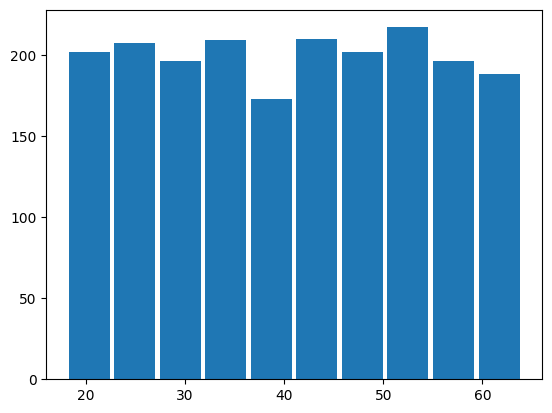

In [50]:
#gerando histograma usando o atributo age
plt.hist(x = base_credit['age'], rwidth=0.9);

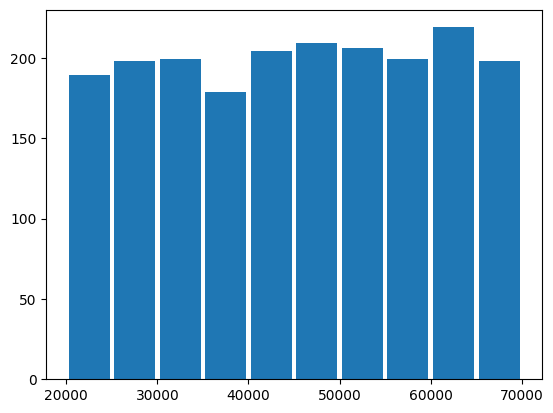

In [13]:
#gerando histograma baseado na renda
plt.hist(x=base_credit['income'], rwidth=0.9);

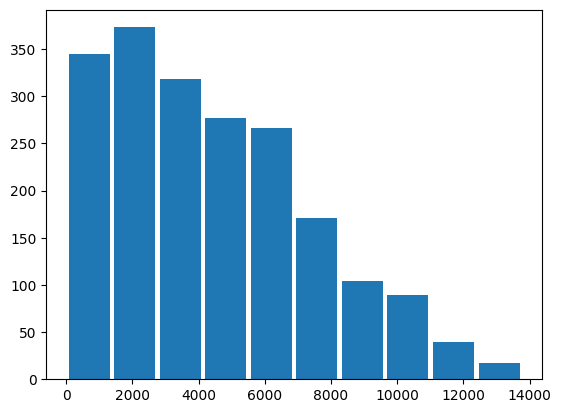

In [14]:
#gerando histrograma baseado na dívida
plt.hist(x=base_credit['loan'], rwidth=0.9);

In [15]:
#gerando gráfico de dispersão combinando age com income e loan, usando default como cor mostrar quem pagou e quem deve
grafico = px.scatter_matrix(base_credit, dimensions=['age','income','loan'], color='default');
grafico.show(renderer="browser")

### Tratamento de valores inconsistentes

In [16]:
#fazendo localização de registros com idade negativa
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
#outra forma de fazer o mesmo porém usando filtros diretos
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [18]:
#há 3 registros com idade inválida, uma das forma de resolver isso é apagando a coluna inteira
base_credit_idade_apagada = base_credit.drop('age', axis = 1)
base_credit_idade_apagada

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [19]:
#outra forma é apagar somente os registos com valores inconsistentes
base_credit_registros_apagados = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit_registros_apagados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [20]:
#verificando se deu certo 
base_credit_registros_apagados.loc[base_credit_registros_apagados['age'] < 0]

,clientid,income,age,loan,default


In [21]:
#há também uma terceira maneira que é mais recomendável: preencher os valores inconsistentes manualmente
#Quarta forma : preencher os valores inválidos com a média dos mesmos

In [22]:
#preechendo a média de todos os atributos
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [23]:
#podemos acessar a média filtrando por um atributo
#como estamos usando a base de dados completa esse retorno incluiu as idades inváldias no cálculo
float(base_credit['age'].mean())

40.80755937840458

In [24]:
#vamos buscar os registros que tem idade maior que zero e calcular a média
float(base_credit['age'][base_credit ['age'] > 0].mean())

40.92770044906149

In [ ]:
#agora vamos preencher os valores inválidos com a média
base_credit['age'][base_credit['age'] < 0] = 40.92

In [26]:
#Verificando se a atualização foi bem-sucedida
base_credit.loc[base_credit['age'] < 0 ]

,clientid,income,age,loan,default


In [27]:
#verificando os registros modificados individualmente 
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


### Tratamento de valores faltantes

In [28]:
#verificando valores nulos
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [29]:
#como são muitos registros a visualização anterior não é tão interessantes
#Vamos fazer o somatório
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [30]:
#visualizando os registros cuja a idade está faltando
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
#Vamos preencher usando a média do atributo age
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [32]:
#checando se os valores foram atualzados
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [33]:
#visualizando os registros alterados
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


### Divisão entre previsores e classe

In [34]:
#precisamos de uma variável para o s atributos previsores e outra para a classe
#selecionando as colunas 
X_credit = base_credit.iloc[:, 1:4].values


In [35]:
#verificando valor da variável
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]], shape=(2000, 3))

In [36]:
#verificando o tipo da variável
type(X_credit)

numpy.ndarray

In [37]:
#é 4 pois seria 3 se fosse um intervalo
Y_credit = base_credit.iloc[:, 4].values

In [38]:
#verificando o valor da variável
Y_credit

array([0, 0, 0, ..., 1, 0, 0], shape=(2000,))

In [39]:
#verificando tipo
type(Y_credit)

numpy.ndarray

### Escalonamento dos valores

In [40]:
#atributos previsores
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]], shape=(2000, 3))

In [41]:
#Podemos visualizar o menor valor das colunas 
float(X_credit[:, 0].min()), float(X_credit[:, 1].min()),float(X_credit[:, 2].min())

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [42]:
#visualizando o maior valor das colunas
float(X_credit[:, 0].max()), float(X_credit[:, 1].max()), float(X_credit[:, 2].max())

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [43]:
# como há uma diferença muito grande de escala entre os atributos isso pode causar distorções
# pois os algoritmos podem atribuir pesos muito grandes ao atributo devido a seu valor alto
# então e importante deixar os valores na mesma escala
# podemos usar os cálculos da padronização ou normalização
# padronização é mais indicada quando temos outliers na base de dados como os valores negativos na coluna idade 
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)


In [44]:
#agora vamos comparar os valores mínimos e máximos novamente
float(X_credit[:, 0].min()), float(X_credit[:, 1].min()),float(X_credit[:, 2].min())

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [45]:
float(X_credit[:, 0].max()), float(X_credit[:, 1].max()), float(X_credit[:, 2].max())

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [46]:
#checando resultado
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]], shape=(2000, 3))

In [47]:
#salvando a base de dados processada
base_credit.to_csv('../datasets/credit_data_processado.csv', index=False, sep=';')


# Divisão da base em treinamento e teste

In [48]:
from sklearn.model_selection import train_test_split

In [ ]:
# separando os atributos previsores e classe em uma porção para treinamento e outra para teste
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size = 0.25, random_state = 0)

In [ ]:
# verificando variável de treinamento dos atributos previsores
# como definido no método naterior temos 75% dos dados nas bases de treinamento e 25% nas bases de teste
X_credit_treinamento.shape

(1500, 3)

In [ ]:
# verificando variável de treinamento dos atributos clase
Y_credit_treinamento.shape

(1500,)

In [55]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))